# Yahoo Finance 下載台積電股價資料


In [350]:
import yfinance as yf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 台積電股價資料

In [351]:
TSMC = yf.Ticker("2330.TW")
TSMC.info


{'address1': 'Hsinchu Science Park',
 'address2': 'No. 8, Li-Hsin Road 6',
 'city': 'Hsinchu City',
 'zip': '300096',
 'country': 'Taiwan',
 'phone': '886 3 563 6688',
 'fax': '886 3 563 7000',
 'website': 'https://www.tsmc.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Taiwan Semiconductor Manufacturing Company Limited, together with its subsidiaries, manufactures, packages, tests, and sells integrated circuits and other semiconductor devices in Taiwan, China, Europe, the Middle East, Africa, Japan, the United States, and internationally. It provides a range of wafer fabrication processes, including processes to manufacture complementary metal- oxide-semiconductor (CMOS) logic, mixed-signal, radio frequency, embedded memory, bipolar CMOS mixed-signal, and others. The company also offers customer and engineering support se

In [352]:
tsmc = yf.download('2330.TW',start='2016-01-01',end='2021-01-01')
tsmc

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
Date,,,,,,
2016-01-04,107.623650,139.5,143.5,139.0,142.5,39169000
2016-01-05,106.466423,138.0,140.0,137.0,139.0,46381000
2016-01-06,104.537666,135.5,138.0,135.0,138.0,53617000
2016-01-07,102.608902,133.0,135.0,130.5,134.5,62539000
2016-01-08,103.380432,134.0,135.0,132.0,132.0,50123000
...,...,...,...,...,...,...
2020-12-25,473.202179,511.0,515.0,510.0,514.0,12327895
2020-12-28,476.906250,515.0,515.0,509.0,512.0,19087382


In [353]:
tsmc = yf.download('2330.TW',period='5y', interval='1d')
avg_values = (tsmc['High'] + tsmc['Low']) / 2
avg_values.to_csv('tsmc_avg_prices.csv')
avg_values


[*********************100%***********************]  1 of 1 completed


Ticker,2330.TW
Date,
2019-12-17,340.00
2019-12-18,343.25
2019-12-19,338.50
2019-12-20,330.75
2019-12-23,331.75
...,...
2024-12-11,1052.50
2024-12-12,1060.00
2024-12-13,1062.50


In [354]:
avg_values = pd.read_csv('tsmc_avg_prices.csv')
avg_values



,Date,2330.TW
0,2019-12-17,340.00
1,2019-12-18,343.25
2,2019-12-19,338.50
3,2019-12-20,330.75
4,2019-12-23,331.75
...,...,...
1211,2024-12-11,1052.50
1212,2024-12-12,1060.00
1213,2024-12-13,1062.50
1214,2024-12-16,1080.00


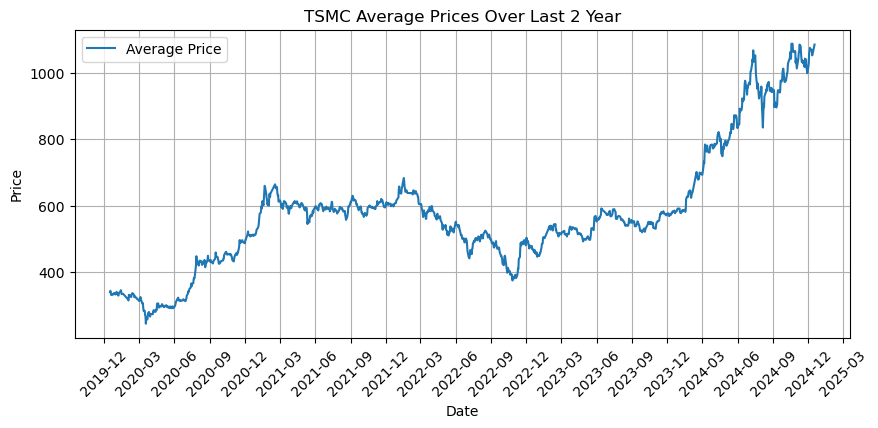

In [355]:
# 繪製折線圖
plt.figure(figsize=(10, 4))
# 將Datetime轉換為datetime格式以便更好地處理時間軸
avg_values['Date'] = pd.to_datetime(avg_values['Date'])
# 設定x軸的刻度為每3個月一個標籤
plt.plot(avg_values['Date'], avg_values['2330.TW'], label='Average Price')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))
plt.title('TSMC Average Prices Over Last 2 Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [356]:
#SEQ_LEN = 60
#FUTURE_PERIOD_PREDICT = 1 #day, how far into the future are we trying to predict?
#RATIO_TO_PREDICT = "avg"
# 設定參數
SEQ_LEN = 60  # 序列長度
FUTURE_PERIOD_PREDICT = 3  # 預測未來天數
RATIO_TO_PREDICT = "2330.TW"  # 要預測的欄位

In [357]:
def classify(current, future):
    if float(future) > float(current):
        return 1
    else:
        return 0

In [358]:
avg_values['future'] = avg_values[RATIO_TO_PREDICT].shift(-FUTURE_PERIOD_PREDICT)
avg_values['target'] = list(map(classify, avg_values[RATIO_TO_PREDICT], avg_values['future']))
avg_values

,Date,2330.TW,future,target
0,2019-12-17,340.00,330.75,0
1,2019-12-18,343.25,331.75,0
2,2019-12-19,338.50,333.25,0
3,2019-12-20,330.75,332.75,1
4,2019-12-23,331.75,332.75,1
...,...,...,...,...
1211,2024-12-11,1052.50,1080.00,1
1212,2024-12-12,1060.00,1085.00,1
1213,2024-12-13,1062.50,NaN,0
1214,2024-12-16,1080.00,NaN,0


(912, 3)
(121, 3)
(121, 3)


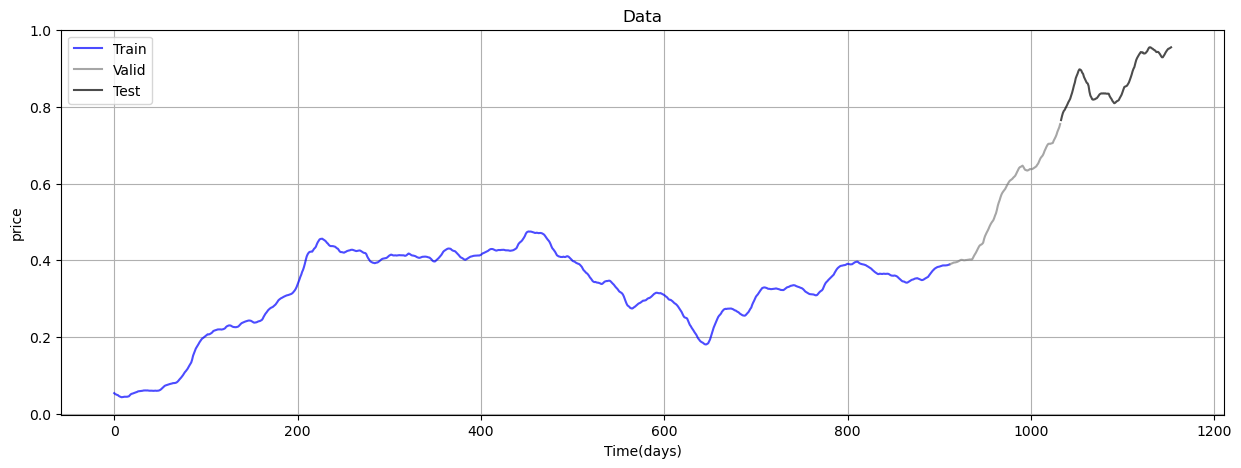

總數據量: 1216
訓練集大小: 912
驗證集大小: 121
測試集大小: 121


In [359]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt


# 獲取所有數據並進行預處理
all_data = avg_values[RATIO_TO_PREDICT].values.reshape(-1, 1)

# 使用MinMaxScaler進行整體歸一化
scaler = MinMaxScaler()
all_data_scaled = scaler.fit_transform(all_data)

# 應用EMA平滑處理到整個數據集
def apply_ema(data, gamma=0.1):
    ema = 0.0
    smoothed_data = np.zeros_like(data)
    for i in range(len(data)):
        ema = gamma * data[i] + (1 - gamma) * ema
        smoothed_data[i] = ema
    return smoothed_data

all_data_smoothed = apply_ema(all_data_scaled)

# 計算分割點
total_len = len(all_data_smoothed)
train_len = int(0.8 * total_len)
valid_len = int(0.1 * total_len)
test_len = total_len - train_len - valid_len

# 創建序列數據的函數
def create_sequences(data, seq_length, future_period):
    X, y = [], []
    for i in range(len(data) - seq_length - future_period + 1):
        X.append(data[i:(i + seq_length)]) #0-4
        y.append(data[i + seq_length:(i + seq_length + future_period)]) #5   
    return np.array(X), np.array(y)

# 創建完整的序列數據
X_all, y_all = create_sequences(all_data_smoothed, SEQ_LEN, FUTURE_PERIOD_PREDICT)

# 分割序列數據
train_end = train_len - SEQ_LEN
val_end = train_len + valid_len - SEQ_LEN

X_train = X_all[:train_end]
y_train = y_all[:train_end]

X_valid = X_all[train_end:val_end]
y_valid = y_all[train_end:val_end]

X_test = X_all[val_end:]
y_test = y_all[val_end:]

# 重塑數據
if len(X_train) > 0:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
if len(X_valid) > 0:
    X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
if len(X_test) > 0:
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], ))
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], ))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], ))
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

# 畫出預測圖表
plt.figure(figsize=(15, 5))

# 繪製訓練數據
if len(y_train) > 0:
    plt.plot(range(y_train.shape[0]), y_train[:, 0], 
             color='blue', label='Train', alpha=0.7)

# 繪製驗證數據
if len(y_valid) > 0:
    plt.plot(range(y_train.shape[0], y_train.shape[0] + y_valid.shape[0]), 
             y_valid[:, 0], color='gray', label='Valid', alpha=0.7)

# 繪製測試數據
if len(y_test) > 0:
    plt.plot(range(y_train.shape[0] + y_valid.shape[0], 
                   y_train.shape[0] + y_valid.shape[0] + y_test.shape[0]),
             y_test[:, 0], color='black', label='Test', alpha=0.7)

plt.title('Data')
plt.xlabel('Time(days)')
plt.ylabel('price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 打印數據集大小
print(f"總數據量: {len(all_data_smoothed)}")
print(f"訓練集大小: {len(y_train)}")
print(f"驗證集大小: {len(y_valid)}")
print(f"測試集大小: {len(y_test)}")

In [360]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)
print(y_train[0])
print(y_valid[0])
print(y_test[0])



(912, 60, 1)
(121, 60, 1)
(121, 60, 1)
(912, 3)
(121, 3)
(121, 3)
[0.05315892 0.05089669 0.0496908 ]
[0.38966701 0.39087226 0.39171981]
[0.76560418 0.77582111 0.78418623]


# LSTM

In [361]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import math

In [362]:
# 定義LSTM模型
class LSTMModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, 50, batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        self.lstm2 = nn.LSTM(50, 60, batch_first=True)
        self.dropout2 = nn.Dropout(0.3)
        self.lstm3 = nn.LSTM(60, 80, batch_first=True)
        self.dropout3 = nn.Dropout(0.4)
        self.lstm4 = nn.LSTM(80, 120, batch_first=True)
        self.dropout4 = nn.Dropout(0.5)
        
        # 加入Attention層
        self.attention = nn.MultiheadAttention(120, num_heads=12, batch_first=True)
        self.layer_norm = nn.LayerNorm(120)
        
        self.fc = nn.Linear(120, output_size)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.dropout1(x)
        x, _ = self.lstm2(x)
        x = self.dropout2(x)
        x, _ = self.lstm3(x)
        x = self.dropout3(x)
        x, _ = self.lstm4(x)
        x = self.dropout4(x)
        
        # 加入Attention機制
        attn_output, _ = self.attention(x, x, x)
        x = self.layer_norm(x + attn_output)  # 加入殘差連接和層正規化
        
        x = self.fc(x[:, -1, :])
        return x


In [363]:
# 創建數據加載器
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
# 初始化數據加載器
train_dataset = StockDataset(X_train, y_train)
valid_dataset = StockDataset(X_valid, y_valid)
test_dataset = StockDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [364]:
# 初始化模型
import copy
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(input_size=1, output_size=FUTURE_PERIOD_PREDICT).to(device)

# 定義損失函數和優化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 訓練模型
num_epochs = 60
train_losses = []
valid_losses = []

# Early stopping 參數
patience = 20  # 容忍多少個epoch驗證損失沒有改善
min_delta = 0.0001  # 最小改善閾值
best_loss = float('inf')
patience_counter = 0
best_model = None

for epoch in range(num_epochs):
    # 訓練階段
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.squeeze())
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # 驗證階段
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.squeeze())
            valid_loss += loss.item()
    
    train_losses.append(train_loss/len(train_loader))
    valid_losses.append(valid_loss/len(valid_loader))
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Valid Loss: {valid_losses[-1]:.4f}')

    # Early stopping 檢查
    '''
    current_loss = valid_losses[-1]
    if current_loss < best_loss - min_delta:
        best_loss = current_loss
        patience_counter = 0
        best_model = copy.deepcopy(model.state_dict())
    else:
        patience_counter += 1
        
    if patience_counter >= patience:
        print(f'Early stopping triggered at epoch {epoch+1}')
        model.load_state_dict(best_model)  # 恢復最佳模型
        break
    '''

Epoch [1/60], Train Loss: 0.1058, Valid Loss: 0.0547
Epoch [2/60], Train Loss: 0.0287, Valid Loss: 0.0609
Epoch [3/60], Train Loss: 0.0164, Valid Loss: 0.0304
Epoch [4/60], Train Loss: 0.0083, Valid Loss: 0.0321
Epoch [5/60], Train Loss: 0.0050, Valid Loss: 0.0203
Epoch [6/60], Train Loss: 0.0035, Valid Loss: 0.0128
Epoch [7/60], Train Loss: 0.0029, Valid Loss: 0.0146
Epoch [8/60], Train Loss: 0.0024, Valid Loss: 0.0102
Epoch [9/60], Train Loss: 0.0024, Valid Loss: 0.0129
Epoch [10/60], Train Loss: 0.0022, Valid Loss: 0.0117
Epoch [11/60], Train Loss: 0.0020, Valid Loss: 0.0087
Epoch [12/60], Train Loss: 0.0020, Valid Loss: 0.0070
Epoch [13/60], Train Loss: 0.0015, Valid Loss: 0.0081
Epoch [14/60], Train Loss: 0.0014, Valid Loss: 0.0095
Epoch [15/60], Train Loss: 0.0014, Valid Loss: 0.0072
Epoch [16/60], Train Loss: 0.0016, Valid Loss: 0.0076
Epoch [17/60], Train Loss: 0.0012, Valid Loss: 0.0079
Epoch [18/60], Train Loss: 0.0011, Valid Loss: 0.0053
Epoch [19/60], Train Loss: 0.0010, Va

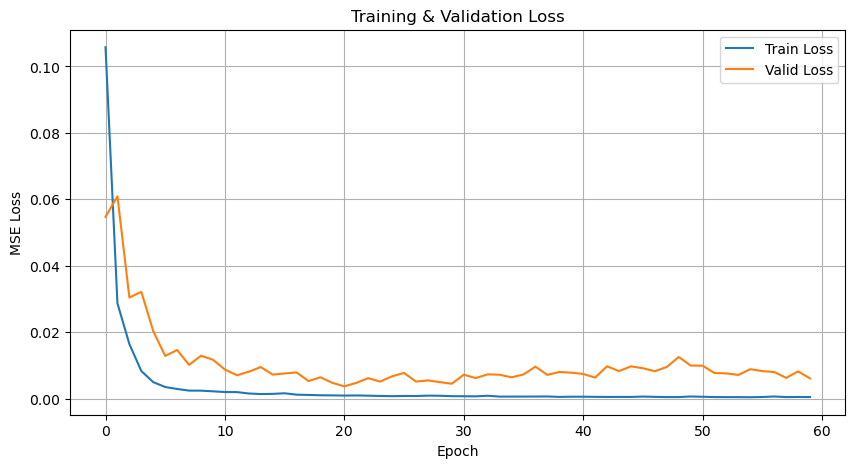

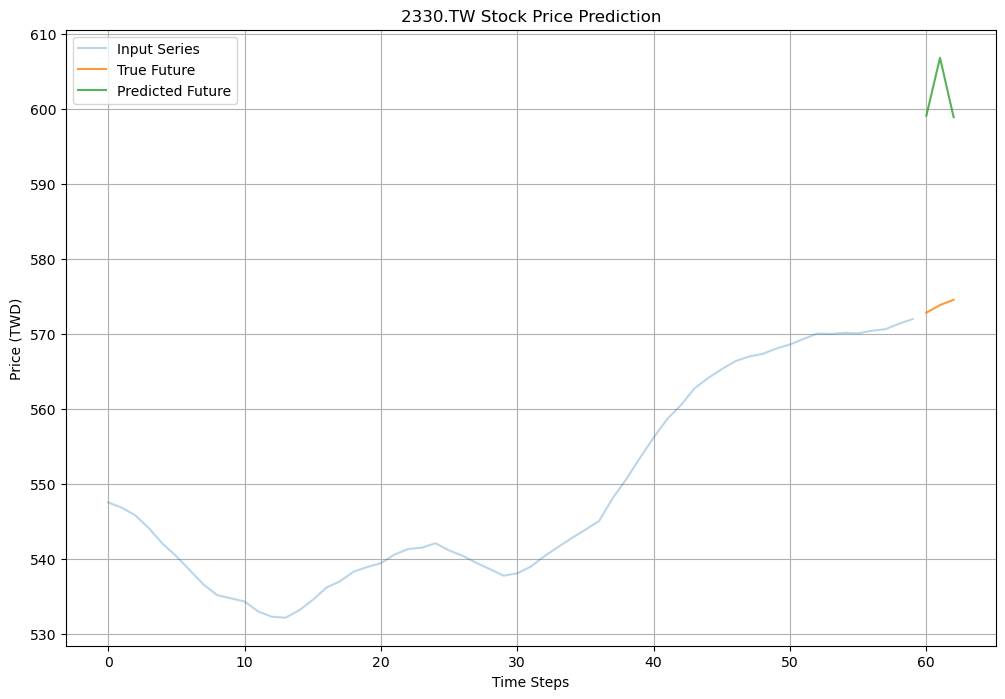

MAE: 27.8609


In [365]:
# 繪製訓練損失曲線
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.legend()
plt.show()

# 預測和可視化
def plot_series(x_data, y, y_pred):
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(x_data)), x_data, label='Input Series', alpha=0.3)
    
    input_len = len(x_data)
    plt.plot(range(input_len, input_len + len(y)), y, 
             label='True Future', alpha=0.8)
    plt.plot(range(input_len, input_len + len(y_pred)), y_pred, 
             label='Predicted Future', alpha=0.8)
    
    plt.legend()
    plt.title(f'{RATIO_TO_PREDICT} Stock Price Prediction')
    plt.xlabel('Time Steps')
    plt.ylabel('Price (TWD)')
    plt.grid(True)
    plt.show()

def show_prediction_with_mae():
    x, y_true = next(iter(valid_loader))
    x, y_true = x.to(device), y_true.to(device)
    
    model.eval()
    with torch.no_grad():
        y_pred = model(x)
    
    x = x[0].cpu().numpy()
    y_true = y_true[0].cpu().numpy()
    y_pred = y_pred[0].cpu().numpy()
    
    x_temp = x[:, 0] * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
    y_true = y_true * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
    y_pred = y_pred * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
    
    plot_series(x_temp, y_true, y_pred)
    
    mae = np.mean(np.abs(y_pred - y_true))
    print(f'MAE: {mae:.4f}')

# 顯示預測結果
show_prediction_with_mae()

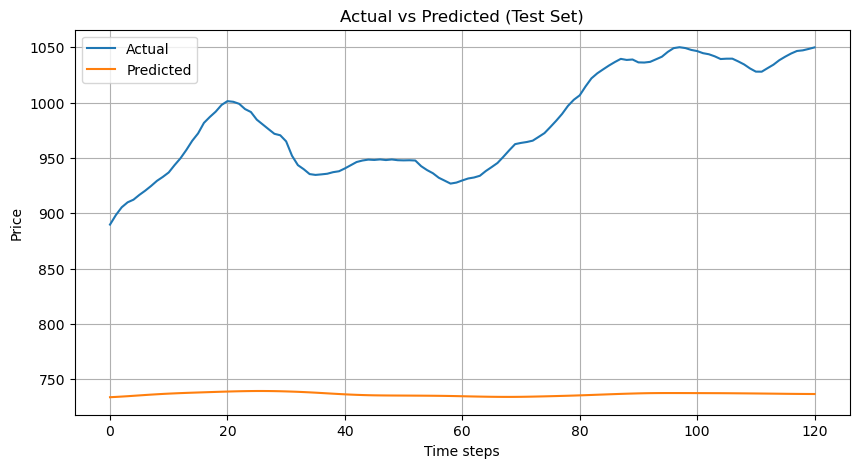

In [366]:
# 1. 準備測試數據
X_test_tensor = torch.FloatTensor(X_test).to(device)

# 2. 進行預測
with torch.no_grad():
    predicted = model(X_test_tensor).cpu().numpy()

# 3. 數據轉換
# 將預測值轉回原始比例
predicted = predicted.reshape(-1, 1)
predicted_original = scaler.inverse_transform(predicted)

# 將實際值轉回原始比例
actual_original = scaler.inverse_transform(y_test.reshape(-1,1))

# 4. 取樣（每5個數據點取1個）
daily_indices = range(0, len(actual_original), 3)
daily_indices2 = range(0, len(predicted_original), 3)
actual_daily = actual_original[daily_indices]
predicted_daily = predicted_original[daily_indices2]

# 5. 繪製圖表
plt.figure(figsize=(10,5))
plt.plot(range(len(actual_daily)), actual_daily, label='Actual')
plt.plot(range(len(predicted_daily)), predicted_daily, label='Predicted')
plt.title('Actual vs Predicted (Test Set)')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()